### Execution

As per the task here are the steps I took to get final resuls

1. Explore both data source to see whether they are similar and what are characteristics of both the datasets. Further can we get any idea about the spread of the topics being used in both data sources
2. Below, we have seen that although both of the datasets have somehow different characteristic but still they share some words.So, we a simple classification based approach the see if we can assign an appropriate topic to each text unlabelled dataset based the labelled dataset. Ofcourse here we wont get new topics yet...
3. Sentence based embeddings and clustering them to see if that can work
4. Sophisticated Topic modeling techniques
    a. LDA etc.
    b. BertTopic

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from utils import Dataset, Preprocessing

import warnings
warnings.filterwarnings('ignore')

sns.set_theme()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zaheerbabar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data_obj = Dataset() 

# get labelled data
train_df = data_obj.get_labelled_data()

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   phrase  1525 non-null   object
 1   label   1525 non-null   object
dtypes: object(2)
memory usage: 24.0+ KB


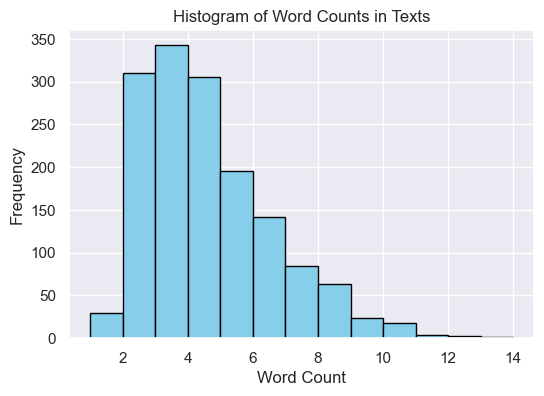

In [3]:
# Function to count words
def count_words(text):
    return len(text.split())

# Apply the function to the 'phrase' column
train_df['word_count'] = train_df['phrase'].apply(count_words)

# Plotting histogram
plt.figure(figsize=(6, 4))
plt.hist(train_df['word_count'], bins=range(1, train_df['word_count'].max() + 2), edgecolor='black', color='skyblue')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts in Texts')
plt.show()

In [4]:
data_obj = Dataset() 

# get labelled data
test_df = data_obj.get_unlabelled_data()

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4289 entries, 0 to 4288
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_msg  3791 non-null   object
dtypes: object(1)
memory usage: 33.6+ KB


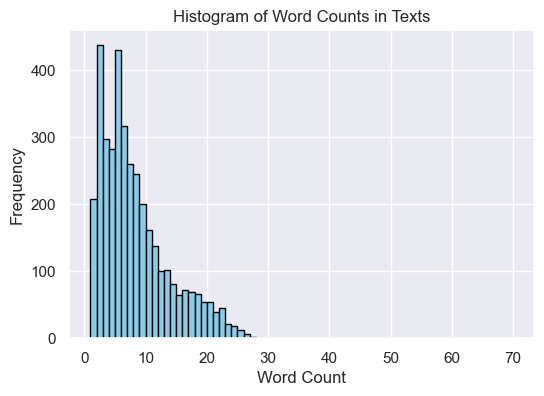

In [5]:
# Apply the function to the 'phrase' column
# test_df['user_msg'] = test_df['user_msg'].fillna("leeg")
test_df= test_df.dropna()


test_df = test_df.reset_index(drop= True)

test_df['word_count'] = test_df['user_msg'].apply(count_words)

# # Plotting histogram
plt.figure(figsize=(6, 4))
plt.hist(test_df['word_count'], bins=range(1, test_df['word_count'].max() + 2), edgecolor='black', color='skyblue')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts in Unlabelled Texts')
plt.show()

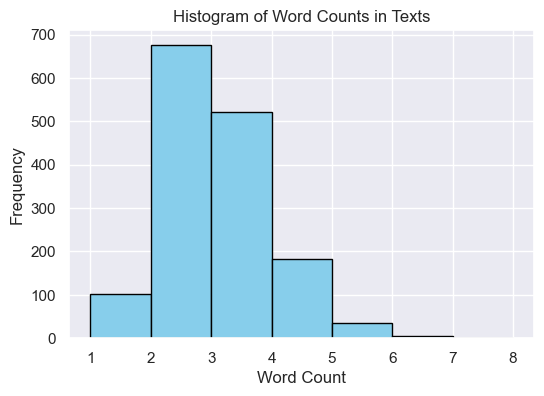

In [6]:
process_obj = Preprocessing()

# preprocessing includes, text cleaning and label encoding
cleaned_train_df = process_obj.get_preprocessd_data(train_df, text_column="phrase")


cleaned_train_df['word_count'] = cleaned_train_df['cleaned_text'].apply(count_words)

# # Plotting histogram
plt.figure(figsize=(6, 4))
plt.hist(cleaned_train_df['word_count'], bins=range(1, cleaned_train_df['word_count'].max() + 2), edgecolor='black', color='skyblue')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts in Texts')
plt.show()


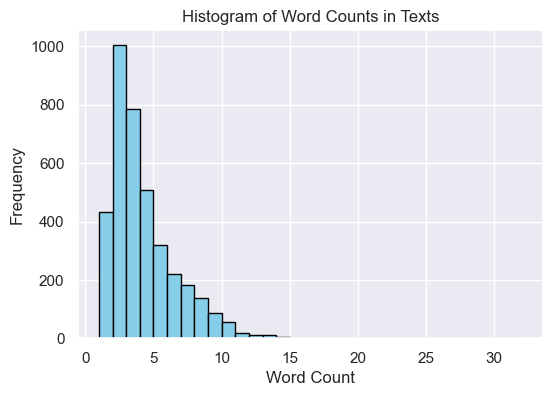

In [7]:
process_obj = Preprocessing()

# preprocessing includes, text cleaning and label encoding
cleaned_test_df = process_obj.get_preprocessd_data(test_df, text_column="user_msg", has_labels = False)

cleaned_test_df['word_count'] = cleaned_test_df['cleaned_text'].apply(count_words)

# # Plotting histogram
plt.figure(figsize=(6, 4))
plt.hist(cleaned_test_df['word_count'], bins=range(1, cleaned_test_df['word_count'].max() + 2), edgecolor='black', color='skyblue')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts in Texts')
plt.show()

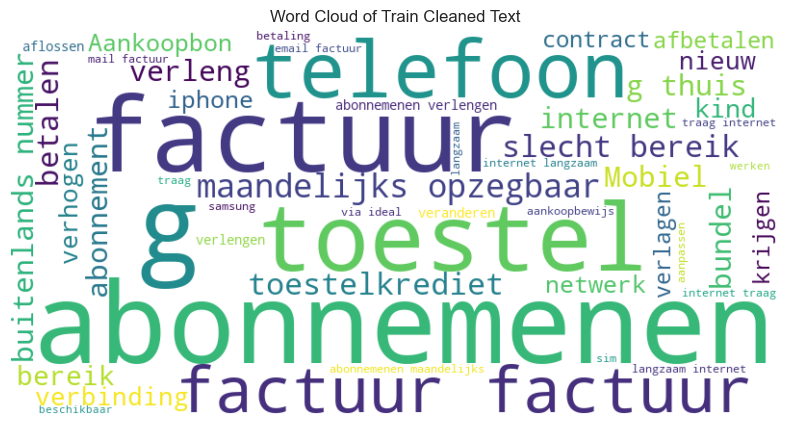

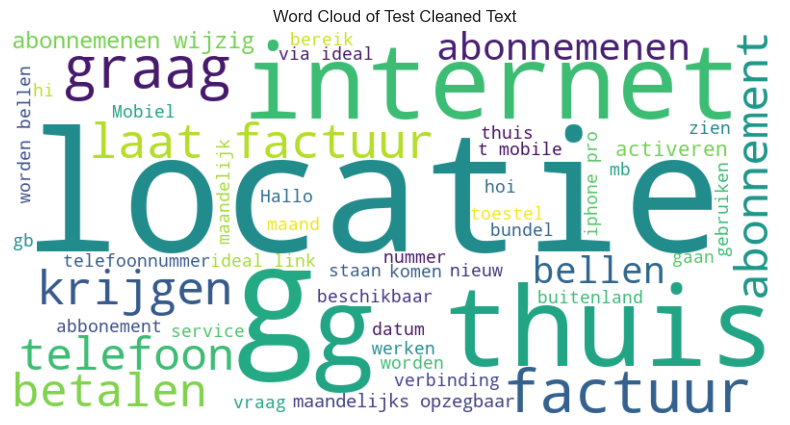

In [8]:

# Combine all text into a single string
text = ' '.join(cleaned_train_df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Train Cleaned Text')
plt.show()

# Combine all text into a single string
text = ' '.join(cleaned_test_df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Test Cleaned Text')
plt.show()